Perform PCA on the given dataset and build different classification and
clustering models.

//Iris dataset

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



//Classification Models:
Logistic Regression Accuracy: 0.9333333333333333
Decision Tree Accuracy: 1.0
SVM Accuracy: 0.92
Naive Bayes Accuracy: 0.8933333333333333
Neural Network Accuracy: 0.92

//Clustering Models:
K-means Silhouette Score: 0.5091683341503112
Agglomerative Clustering Silhouette Score: 0.5110595988738582
DBSCAN Silhouette Score: 0.5245307474132591


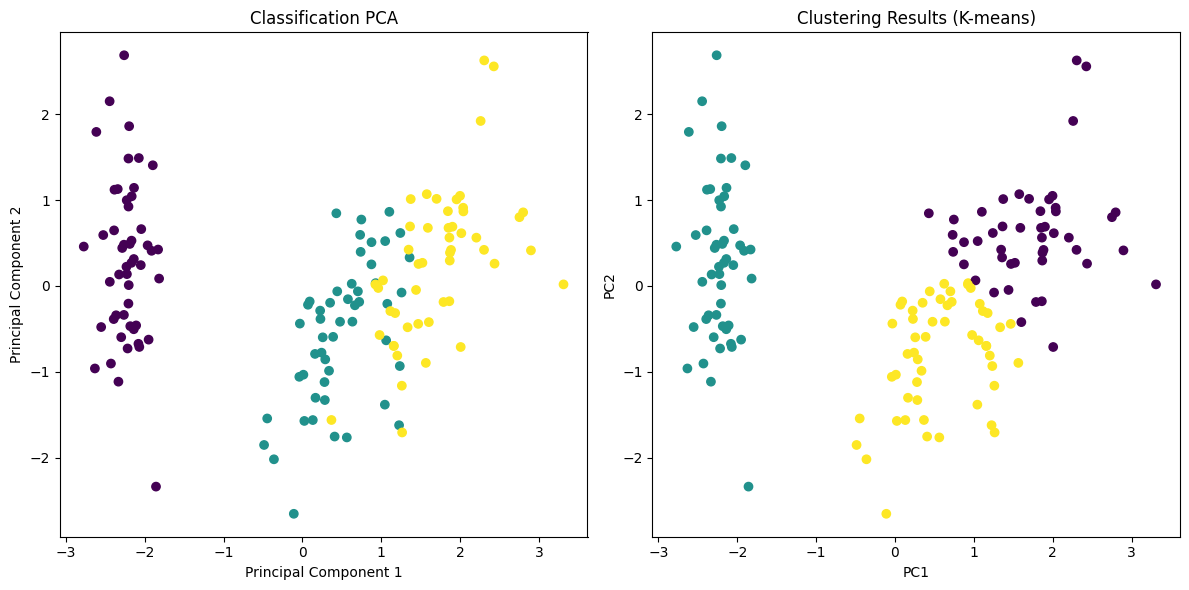

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Read the Iris dataset
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Display the first few rows of the DataFrame
print('//Iris dataset\n')
print(iris_df.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Classification models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_pca, y)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_pca, y)

# Support Vector Machine
svm = SVC()
svm.fit(X_pca, y)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_pca, y)

# Multi-Layer Perceptron
nn = MLPClassifier(max_iter=1000)
nn.fit(X_pca, y)

# Clustering models
# K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Hierarchical
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_pca)

# Density-based Clustering
dbscan = DBSCAN()
dbscan.fit(X_pca)

gmm = GaussianMixture(n_components=3)
gmm.fit(X_pca)

# Evaluation
y_pred_logreg = logreg.predict(X_pca)
accuracy_logreg = accuracy_score(y, y_pred_logreg)

y_pred_dt = dt.predict(X_pca)
accuracy_dt = accuracy_score(y, y_pred_dt)

y_pred_svm = svm.predict(X_pca)
accuracy_svm = accuracy_score(y, y_pred_svm)

y_pred_nb = nb.predict(X_pca)
accuracy_nb = accuracy_score(y, y_pred_nb)

y_pred_nn = nn.predict(X_pca)
accuracy_nn = accuracy_score(y, y_pred_nn)

silhouette_kmeans = silhouette_score(X_pca, kmeans.labels_)

silhouette_agg = silhouette_score(X_pca, agg.labels_)

silhouette_dbscan = silhouette_score(X_pca, dbscan.labels_)

silhouette_gmm = silhouette_score(X_pca, gmm.predict(X_pca))

print("\n//Classification Models:")
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Decision Tree Accuracy:", accuracy_dt)
print("SVM Accuracy:", accuracy_svm)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Neural Network Accuracy:", accuracy_nn)

print("\n//Clustering Models:")
print("K-means Silhouette Score:", silhouette_kmeans)
print("Agglomerative Clustering Silhouette Score:", silhouette_agg)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

# Visualization
plt.figure(figsize=(12, 6))

# Classification
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("Classification PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Clustering Results (K-means)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()